# Homework
 
## Reading
 - Functions (and methods) - Model Ch 2. pp 24-29
 - Modules - Model Ch 2.  pp 34-41, 44
 - Namespaces - Model Ch 2. pp 21-22, 27, 34-37
 
## Lab
 - Lab 4 due next Monday
 - submit in “assignments” section of Canvas

# Research Programming in the Life Sciences
## re, regular expressions 

- David L. Bernick, PhD
- Biomolecular Engineering
- Baskin School of Engineering
- UCSC

# Overview
 
 - Codon resources
 - Pattern matching
 - Lab 4

# Quiz 3

 - Q2: what is b? a = [ 1, 2, 3, 4 ]; b = a; a[:] = ‘A’  
 - Q8: the purpose of __init__: initilization of the object
 - Q9: self refers to: the object.

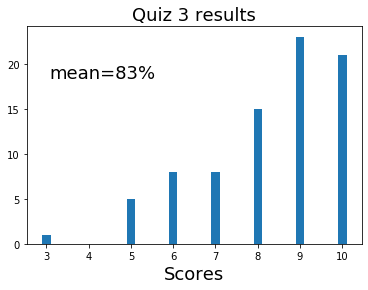

In [2]:
import matplotlib.pyplot as plt
x = [i for i in range(3,11)]
y = [1,0,5,8,8,15,23,21]
plt.bar(x,y,0.2)
plt.xlabel('Scores', fontsize=18)
plt.title('Quiz 3 results',fontsize=18)
plt.figtext(.3,0.7,'mean=83%', fontsize=18, ha='center')
plt.show()

# Codon resources
 - Codon usage database
     - http://www.kazusa.or.jp/codon/readme_codon.html
 - cusp
     - search for “cusp” at http://mobyle.pasteur.fr/cgi-bin/portal.py

# Basics of Pattern Matching
 - The point of pattern matching is to look for a series of characters “the pattern” in some text “the target to match against”
 - We've already seen some simple pattern matching with find() and index()

In [5]:
seq = 'AAAATGAATGGCTAACTTTTGATG'
seq.find('ATG')
seq.index('GTG')   # (raises exception if not found)

ValueError: substring not found

# wordFinder
search online documents for keywords:
 - cancer, PDB, proteinX, etc.
 - seq.find('cancer')
 - seq.index('cancer')

This strategy works great for single words without variation in case, length, or alternative spellings.

# simpleDigest
match restriction enzyme EcoRI: GAATTC

In [1]:
seq = 'AAGGTGAATTCGTTAAC'
seq.find('GAATTC')
seq.index('GAATTC')

5

This strategy works great for EcoRI.
 - What happens for EcoRII? (CCXGG), where X = A,T
     - 2 possibilities
 - How about CjuI? (CAYNNNNNWTG)
     - where Y = CT, N = A,C,G,T, W = G,A
     - 4,096 possibilities

# Regular Expressions
Powerful pattern matching syntax
 - RE Syntax is a bit cryptic but extremely useful
 - We'll cover some of the basics
     - http://re-try.appspot.com
 - See chapter 7 in Model for more details.
     - http://www.regular-expressions.info

# RE Symbols
Regular expressions are made of two kinds of symbols (characters):
 - Those that match themselves: 
     - ‘a’ ‘A’ 1 ‘g’       # normal characters
 - Those that don’t match themselves, but have special meaning
     - \ | () [] ^ $ * ? .    # metacharacters

# Escaping
Sometimes we need to treat a meta-character as a normal symbol
 

In [ ]:
'true\?'     # matches true?
'\(help\)'   # matches (help)
'\[block\]'   # matches [block]

# Character Sets
Set of characters rather than a single possibility
 - Set is denoted by [ ]
 - How can we handle EcoRII? (CCXGG), where X = A,T
     - 'CC[AT]GG'
 - How about CjuI? (CAYNNNNNRTG)
     - 'CA[CT][ACGT][ACGT][ACGT][ACGT][ACGT][GA]TG'

In [2]:
CA[CT][ACGT]{5}[GA]TG

matchString = 'CA[CT][ACGT]{' + str(magicCount(xyzzy)) + '}[GA]TG'

SyntaxError: invalid syntax (<ipython-input-2-6bc42ce9e246>, line 1)

# Character Sets
![Character Sets](Lecture8CharacterSets.png)

In [7]:
def keyFunction (thisTuple):
    return tuple((thisTuple[0], -thisTuple[1]))

myList = [ ('dog', 1), ('cat', 2), ('cat', 1), ('dog', 17) ]
#myList.sort (key=keyFunction)

myList.sort ( key = lambda thisTuple: tuple((thisTuple[0], thisTuple[1])) )

print ( myList)

[('cat', 1), ('cat', 2), ('dog', 1), ('dog', 17)]


# Character Classes
Groups of characters represented by an escape letter "\"
![CharacterClasses](Lecture8CharacterClasses.png)

# Boundaries
 - Indicate beginning or end of a target
 - These do not match characters, just indicate positions
![Boundaries](Lecture8Boundaries.png)

# Boundary Examples
 - Indicate beginning or end of a target
 - Don't match characters, just indicate positions
 ![Boundary Examples](Lecture8BoundaryExamples.png)

# Variable-Length Matching
Matching repeating patterns
Alters characters in re that directly precedes it
![Var Length](Lecture8VarLength.png)

# Repetition Examples
 ![Repetition](Lecture8Repetition.png)

# Greedy/Nongreedy Matching
Do you want to match the maximum or the minimum possible patterns?
![Greedy](Lecture8Greedy.png)
 - greedy versus non-greedy

In [ ]:
s = <html><head><title>Title</title>
'<.*>' versus '<.*?>'

# Groupings I
 - Allows patterns to be grouped analogous to math
 - Allows sub-pattern to be retrieved, or ignored
 - (...) matches whatever regular expression is inside the parentheses
 - (?:...)  non-grouping version of regular parentheses, substring matched by the group cannot be retrieved after match

# Groupings II
 - what if we wanted to match a phone number?
     - xxx-xxx-xxxx
     - 831-xxx-xxxx
     - 831.xxx.xxxx

In [ ]:
'\d\d\d-\d\d\d-\d\d\d\d'     # brute force
'\d{3}-\d{3}-\d{4}'          # clearer

In [ ]:
'\d{3}[- .]\d{3}[- .]\d{4}'  # various punctuation

In [ ]:
'\d{3}([- .])\d{3}\1\d{4}'   # same punctuation

In [ ]:
'(\d{3})-(\d{3})-(\d{4})'    # groups

# Alternation
The meta character | will let you match more than one possible string

 - For example:
     - 'A|T'       # match if either "A" or "T"
     - 'CGCG|TATA' # match "CGCG" or "TATA"
     - '(UAA)|(UAG)|(UGA)'  # match any stop codon

# re Module
regular expressions are handled with a module
 - __import re__

# re Finding
Two types of finding: search (anywhere) and match (beginning of target)
 - For example:

In [ ]:
import re
pat = 'hello'; tar = 'Hello hello';
# search(pattern, target)
mobj = re.search(pat, tar)
start = mobj.start(); end = mobj.end()
print (start, end)

# match(pattern, target)
pat = 'hello'; tar = 'Hello hello';
mobj = re.match(pat, tar)
print (mobj)

# re Finding II
Two types of multiple finds: findall (tuple) and  finditer (iterable)
 - For example:

In [9]:
import re
# findall(pattern, target)
pat = '[Hh]ello'; tar = 'Hello hello';
mobj = re.findall(pat, tar)
print (mobj)

# finditer(pattern, target)
pat = 'hello'; tar = 'Hello hello';
for mobj in re.finditer(pat, tar):
    print (mobj.start())

['Hello', 'hello']
6


# re Optimize and Reuse
Pattern can be compiled to speed up search and reuse
- For example:

In [8]:
import re
# compile(pattern)
pat = '[Hh]ello'; tar = 'Hello hello';
regex = re.compile(pat)

mo = regex.findall(tar)
print ( mo)

['Hello', 'hello']


# re Replacement
Two types of pattern replacement: sub (string) and subn (tuple)
 - For example:

In [ ]:
import re
# sub(pattern, replacement, target)
pat = '(?:GC){3,}'
seq = 'GCTACTGCGCGCTTCATGTGATGCGCGCGCGCA'
mobj = re.sub(pat, "", seq)
print ( mobj)

# subn(pattern, replacement, target)
pat = '(?:GC){3,}'
seq = 'GCTACTGCGCGCTTCATGTGATGCGCGCGCGCA'
mobj = re.subn(pat, "", seq)
print (mobj)

# Getting Results from re
In Python, there are a number of methods for getting information from the match

# re Groups
Two types of group information:<br>
__group__ (string or tuple) and __groups__ (tuple)
 - For example:

In [ ]:
import re
# group(num1, num2, ...)
pat = '(\w+)\s+(\w+)'; tar = 'Hello Fred!';
mobj = re.match(pat, tar)

print (mobj.group())


# groups()
print (mobj.groups() )

# re Groups II
Groups can also be labeled to refer to them later (?P<name>)
 - For example:

In [ ]:
python3 genomeAnalyzer.py < testgenome.fa > test.out

In [ ]:
import re
# group(num1, num2, ...) - now use name to get grp

pat = '(?P<TBX>TATA..).*(?P<CGislands>(?:GC){3,})' 
seq = 'ATATAAGATGCGCGCGCTTATGCGCGCA'
mobj = re.search(pat, seq)
print (mobj.group('CGislands'))
print (mobj.group('TBX'))

# re Ranges
Three types of range information on match:  start, stop, span
 - For example:

In [ ]:
import re
# start(groupnum)
pat = 'hello'; tar = 'Hello hello';
mobj = re.search(pat, tar)
print (mobj.start())
# end(groupnum)
print (mobj.end())
# span(groupnum)
print (mobj.span())

# Lab 4
Practice with methods, modules, functions
 - NucParams
     - init
     - nucComposition() -- save in Native valid form
     - aaComposition()
     - codonComposition() -- save in RNA form
     - nucCount() -- Native valid form
 - Genome Analysis
     - relative codon usage